In [4]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

#### Load data

In [24]:
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split

In [8]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

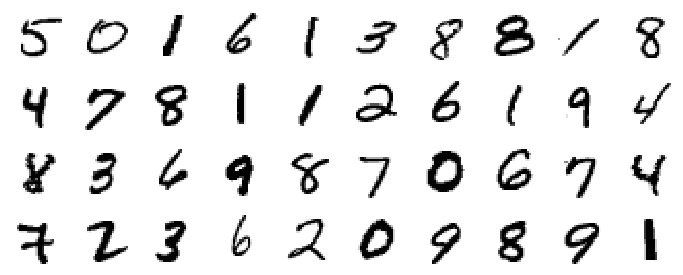

In [30]:
n_rows, n_cols = 4, 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(x_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()

In [23]:
# pd.Series(x_train[0].ravel()).value_counts()
np.unique(x_train[0])

array([  0,   1,   2,   3,   9,  11,  14,  16,  18,  23,  24,  25,  26,
        27,  30,  35,  36,  39,  43,  45,  46,  49,  55,  56,  64,  66,
        70,  78,  80,  81,  82,  90,  93,  94, 107, 108, 114, 119, 126,
       127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166,
       170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205,
       207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244,
       247, 249, 250, 251, 252, 253, 255], dtype=uint8)

In [25]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [26]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

#### Build basic model

In [55]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=x_train.shape[1:], name='input'))
for idx in range(3):
    model.add(keras.layers.Dense(100, activation='elu', name=f'dense_{idx+1}'))
model.add(keras.layers.Dense(10, activation='softmax', name='output'))

model.compile(loss=keras.losses.sparse_categorical_crossentropy,
             optimizer=keras.optimizers.Adam(),
             metrics=['accuracy'])

In [56]:
history = model.fit(x_train, y_train, epochs=30,
                   validation_data=(x_valid, y_valid))

Epoch 1/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2737 - accuracy: 0.9190 - val_loss: 0.1544 - val_accuracy: 0.9533
Epoch 2/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1280 - accuracy: 0.9609 - val_loss: 0.1224 - val_accuracy: 0.9625
Epoch 3/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0944 - accuracy: 0.9706 - val_loss: 0.0975 - val_accuracy: 0.9715
Epoch 4/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0702 - accuracy: 0.9771 - val_loss: 0.1000 - val_accuracy: 0.9722
Epoch 5/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0566 - accuracy: 0.9816 - val_loss: 0.1076 - val_accuracy: 0.9703
Epoch 6/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0465 - accuracy: 0.9846 - val_loss: 0.0992 - val_accuracy: 0.9723
Epoch 7/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0400 - accuracy: 0.9865 - val_loss: 0.1071 - val_accuracy:

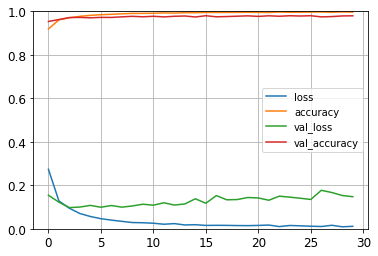

In [57]:
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.ylim(0,1)
plt.show()

The model either overfits, or can't converge due to large learning rate or not enough epochs.

In [58]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1456 - accuracy: 0.9787


[0.14564688503742218, 0.9786999821662903]

#### Improve model

Things to add
- add earlystop & tensorboard callbacks
- explore learning rate
    1. group lr exponentially
    2. plot the loss
    3. find the point where loss shoots up

In [244]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [223]:
from functools import partial

EluDense = partial(keras.layers.Dense,
                   activation='elu', 
                   kernel_initializer = 'he_normal')

In [245]:
# model = keras.Sequential()
# model.add(keras.layers.Flatten(input_shape=x_train.shape[1:], name='input'))
# model.add(EluDense(units=300))
# model.add(EluDense(units=100))
# model.add(keras.layers.Dense(10, activation='softmax', name='output'))
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=x_train.shape[1:], name='input'))
for idx in range(3):
    model.add(keras.layers.Dense(100, activation='elu', name=f'dense_{idx+1}'))
model.add(keras.layers.Dense(10, activation='softmax', name='output'))

In [246]:
initial_lr = 1e-3
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
             optimizer=keras.optimizers.Adam(lr=initial_lr),
             metrics=['accuracy'])

#### Define custom callback to change lr per batch

In [228]:
np.exp(np.log(1e6)/300)

1.0471285480508996

In [247]:
K = keras.backend

class UpdateLearningRateCallback(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs['loss'])   # why training loss not validation loss?
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)
        
growth_factor = 1.005
expon_lr_cb = UpdateLearningRateCallback(factor=growth_factor)

#### Run for one epoch and find a better lr

Fit the model for one epoch and check the loss per batch to find a good learning rate

In [248]:
history = model.fit(x_train, y_train, epochs=1,
                   validation_data=(x_valid, y_valid),
                   callbacks=[expon_lr_cb])

1500/1500 [==============================] - 2s 2ms/step - loss: 110.7575 - accuracy: 0.4416 - val_loss: 99.3013 - val_accuracy: 0.0978


Text(0, 0.5, 'learning_rate')

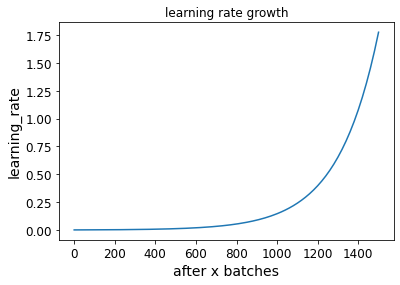

In [249]:
x_seq = np.arange(0, len(x_train) / 32 + 1, 10)
lr_seq = initial_lr * np.power(growth_factor, x_seq)
plt.plot(x_seq, lr_seq)
plt.title('learning rate growth')
plt.xlabel('after x batches')
plt.ylabel('learning_rate')

We can plot the loss as a function of learning rate.

In [250]:
lowest_loss_obtained_at = np.argmin(expon_lr_cb.losses)

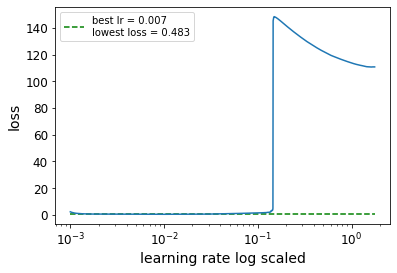

In [251]:
plt.plot(expon_lr_cb.rates, expon_lr_cb.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr_cb.losses), expon_lr_cb.rates[0], expon_lr_cb.rates[-1], color='g', ls='--',
          label = f'best lr = {expon_lr_cb.rates[lowest_loss_obtained_at]:.3f}\nlowest loss = {min(expon_lr_cb.losses):.3f}')
plt.legend(loc='upper left')
plt.xlabel('learning rate log scaled')
plt.ylabel('loss')
plt.show()

The loss shoots up around 0.1. So lets try using 0.01 as our learning rate. (a value somewhat smaller than the shotback lr, usually 10 times smaller)

#### Fit again with new lr and extra callbacks

In [252]:
keras.backend.clear_session()
np.random.seed(27)
tf.random.set_seed(27)

In [253]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=x_train.shape[1:], name='input'))
for idx in range(3):
    model.add(keras.layers.Dense(100, activation='elu', name=f'dense_{idx+1}'))
model.add(keras.layers.Dense(10, activation='softmax', name='output'))

In [254]:
better_lr = 0.01
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
             optimizer=keras.optimizers.Adam(learning_rate=better_lr),
             metrics=['accuracy'])

In [258]:
run_idx = 1
log_dir = os.path.join(os.curdir, 'my_logs', 'run_{:03d}'.format(run_idx))

tensorboard_cb = keras.callbacks.TensorBoard(log_dir)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)

In [259]:
history = model.fit(x_train, y_train, epochs=100,
                   validation_data=(x_valid, y_valid),
                   callbacks=[tensorboard_cb, early_stopping_cb, checkpoint_cb])

Epoch 1/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1546 - accuracy: 0.9690 - val_loss: 0.2641 - val_accuracy: 0.9499
Epoch 2/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1365 - accuracy: 0.9727 - val_loss: 1.2570 - val_accuracy: 0.9488
Epoch 3/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3136 - accuracy: 0.9601 - val_loss: 0.2198 - val_accuracy: 0.9608
Epoch 4/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2099 - accuracy: 0.9706 - val_loss: 0.4109 - val_accuracy: 0.9535
Epoch 5/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1516 - accuracy: 0.9712 - val_loss: 0.2872 - val_accuracy: 0.9506
Epoch 6/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.7057 - accuracy: 0.9645 - val_loss: 0.3100 - val_accuracy: 0.9462
Epoch 7/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1518 - accuracy: 0.9720 - val_loss: 0.2764 - val_ac

**I am quite lost. How can validate accuracy be so much better than test accuracy?**

In [261]:
model = keras.models.load_model("my_mnist_model.h5") # rollback to best model
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 728us/step - loss: 0.2382 - accuracy: 0.0947


[0.23824624717235565, 0.09470000118017197]